In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('covid_recoded_data.csv')


In [3]:
dataset['batch_date'] = pd.to_datetime(dataset['batch_date'])

In [4]:
ds = dataset.groupby('L0_name').resample("W", on='batch_date').mean().reset_index()

In [5]:
dataset2 = pd.read_csv('covid_cases_by_country_by_week.csv')

In [6]:

dataset2['Last_Update'] = pd.to_datetime(dataset2['Last_Update'])

In [7]:
ts_df = pd.merge(ds, dataset2, left_on=['L0_name','batch_date'], right_on=['Country_Region','Last_Update'], how='left')

In [8]:
ts_df.drop(columns=['Country_Region','Last_Update'], inplace=True)

In [9]:
ts_df

,L0_name,batch_date,observation_lat,observation_lon,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,...,did_you_seek_medical_care_to_treat_covid_19_Yes,Unnamed: 0,Confirmed,Deaths,Recovered,Active,Confirmed_new,Deaths_new,Recovered_new,Active_new
0,Afghanistan,2020-04-12,34.217183,68.216042,4.357107,1.339623,NaN,3.326271,3.750000,3.663988,...,0.106479,0,3050,104.0,175.0,2765.0,184.0,3.0,14.0,166.0
1,Afghanistan,2020-04-19,34.299466,67.753603,4.321103,1.319905,NaN,3.551512,3.881631,3.598727,...,0.089502,1,5845,197.0,511.0,5135.0,389.0,14.0,99.0,275.0
2,Afghanistan,2020-04-26,34.302307,67.899875,4.294482,1.385714,NaN,3.563678,3.883417,3.523877,...,0.099045,2,7328,242.0,1006.0,6137.0,408.0,14.0,44.0,308.0
3,Afghanistan,2020-05-03,34.276712,67.863844,4.285887,1.336022,1.179348,3.672907,3.896516,3.443667,...,0.089747,3,13894,434.0,1808.0,11739.0,1006.0,25.0,143.0,838.0
4,Afghanistan,2020-05-10,34.175881,67.687780,4.275401,1.322034,1.199248,3.613688,3.893536,3.302473,...,0.088737,4,23605,704.0,3063.0,19821.0,1572.0,43.0,171.0,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,Zimbabwe,2020-12-06,-18.992088,30.032973,4.300912,1.809524,1.571429,4.262570,4.424581,3.148936,...,0.031915,9310,71618,1957.0,60640.0,9021.0,795.0,16.0,372.0,407.0
2024,Zimbabwe,2020-12-13,-19.120657,29.875486,4.369382,1.833333,1.451613,4.293814,4.451031,3.223315,...,0.025281,9311,76938,2110.0,63997.0,10831.0,602.0,16.0,515.0,71.0
2025,Zimbabwe,2020-12-20,-19.126017,29.911794,4.331010,1.696970,1.759259,4.271967,4.430962,3.099884,...,0.038328,9312,81939,2187.0,68020.0,11732.0,932.0,11.0,625.0,296.0
2026,Zimbabwe,2020-12-27,-19.129810,29.930460,4.328100,1.714286,1.514286,4.249267,4.434018,3.080063,...,0.032967,9313,88576,2319.0,71855.0,14402.0,812.0,23.0,535.0,254.0


In [31]:
X = ts_df.iloc[:,2:-9]

In [11]:
X

,observation_lat,observation_lon,how_concerned_are_you_about_the_spread_of_covid_19_in_your_community,how_satisfied_were_you_with_the_level_of_care_you_received,"how_confident_are_you_that_you_are_immune_should_a_""second_wave""_emerge_in_the_future",how_concerned_are_you_that_you_personally_will_contract_covid_19,how_concerned_are_you_about_your_access_to_adequate_health_care_services_should_you_contract_covid_19,how_difficult_has_it_been_for_you_to_find_groceries_and_other_items,have_you_or_a_family_member_been_affected_by_price_gouging_for_goods_and_services_related_to_the_coronavirus_covid_19,how_concerned_are_you_about_the_long_term_negative_impacts_the_coronavirus_could_have_on_your_national_economy,...,what_do_you_think_of_the_timing_of_the_decision_to_re_open_non_essential_businesses_in_your_area_did not exist,do_you_know_if_testing_for_coronavirus_is_available_in_your_city_I'm not sure,do_you_know_if_testing_for_coronavirus_is_available_in_your_city_No,do_you_know_if_testing_for_coronavirus_is_available_in_your_city_Yes,have_you_personally_contracted_covid_19_I am awaiting test results for COVID-19,"have_you_personally_contracted_covid_19_I may have contracted COVID-19, but have not been tested",have_you_personally_contracted_covid_19_No (tested negative or have shown no symptoms),"have_you_personally_contracted_covid_19_Yes, I was tested and confirmed positive",did_you_seek_medical_care_to_treat_covid_19_No,did_you_seek_medical_care_to_treat_covid_19_Yes
0,34.217183,68.216042,4.357107,1.339623,NaN,3.326271,3.750000,3.663988,3.036163,3.230537,...,1.000000,0.251130,0.323456,0.425414,0.225013,0.158714,0.474134,0.142140,0.035660,0.106479
1,34.299466,67.753603,4.321103,1.319905,NaN,3.551512,3.881631,3.598727,3.065748,3.275716,...,1.000000,0.248356,0.332768,0.418876,0.231813,0.163945,0.483775,0.120467,0.031177,0.089502
2,34.302307,67.899875,4.294482,1.385714,NaN,3.563678,3.883417,3.523877,3.089494,3.258401,...,1.000000,0.220906,0.357446,0.421648,0.228157,0.182703,0.459675,0.129466,0.030421,0.099045
3,34.276712,67.863844,4.285887,1.336022,1.179348,3.672907,3.896516,3.443667,3.122316,3.267069,...,0.656936,0.233293,0.337756,0.428951,0.232328,0.186731,0.463932,0.117008,0.027262,0.089747
4,34.175881,67.687780,4.275401,1.322034,1.199248,3.613688,3.893536,3.302473,3.106283,3.252172,...,0.330214,0.230615,0.336230,0.433155,0.241644,0.199365,0.439505,0.119485,0.030749,0.088737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,-18.992088,30.032973,4.300912,1.809524,1.571429,4.262570,4.424581,3.148936,3.478723,3.770517,...,0.000000,0.215805,0.264438,0.519757,0.118541,0.294833,0.544073,0.042553,0.010638,0.031915
2024,-19.120657,29.875486,4.369382,1.833333,1.451613,4.293814,4.451031,3.223315,3.379213,3.735955,...,0.000000,0.233146,0.252809,0.514045,0.141854,0.269663,0.544944,0.043539,0.018258,0.025281
2025,-19.126017,29.911794,4.331010,1.696970,1.759259,4.271967,4.430962,3.099884,3.373984,3.649245,...,0.000000,0.199768,0.268293,0.531940,0.120790,0.261324,0.555168,0.062718,0.024390,0.038328
2026,-19.129810,29.930460,4.328100,1.714286,1.514286,4.249267,4.434018,3.080063,3.408163,3.684458,...,0.000000,0.211931,0.244898,0.543171,0.116170,0.293564,0.535322,0.054945,0.021978,0.032967


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

In [13]:
y = ts_df.iloc[:,-1]

In [14]:
y

0        166.0
1        275.0
2        308.0
3        838.0
4       1350.0
         ...  
2023     407.0
2024      71.0
2025     296.0
2026     254.0
2027     648.0
Name: Active_new, Length: 2028, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [35]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 32.668110, while the model output was 31.000000. If this difference is acceptable you can set check_additivity=False to disable this check.

Use Mexico and use daily data

In [17]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [18]:
xg_reg.fit(X_train,y_train)

[19:09:12] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [19]:
preds = xg_reg.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 31192.379757


In [21]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:09:12] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:12] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:09:12] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,160114.796875,76695.162177,138068.895834,123629.326682
1,151703.912760,72931.532702,136923.458333,124354.776111
2,143812.550781,69374.054095,135632.255209,123094.078332
3,136273.132813,66013.434478,134595.279297,122791.963925
4,129108.718750,62705.452532,132809.994792,121602.773583


In [24]:
print((cv_results["test-rmse-mean"]).tail(1))

29    125793.683594
Name: test-rmse-mean, dtype: float64


In [25]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:09:13] WARNING: d:\bld\xgboost-split_1615294821523\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


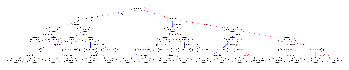

In [26]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

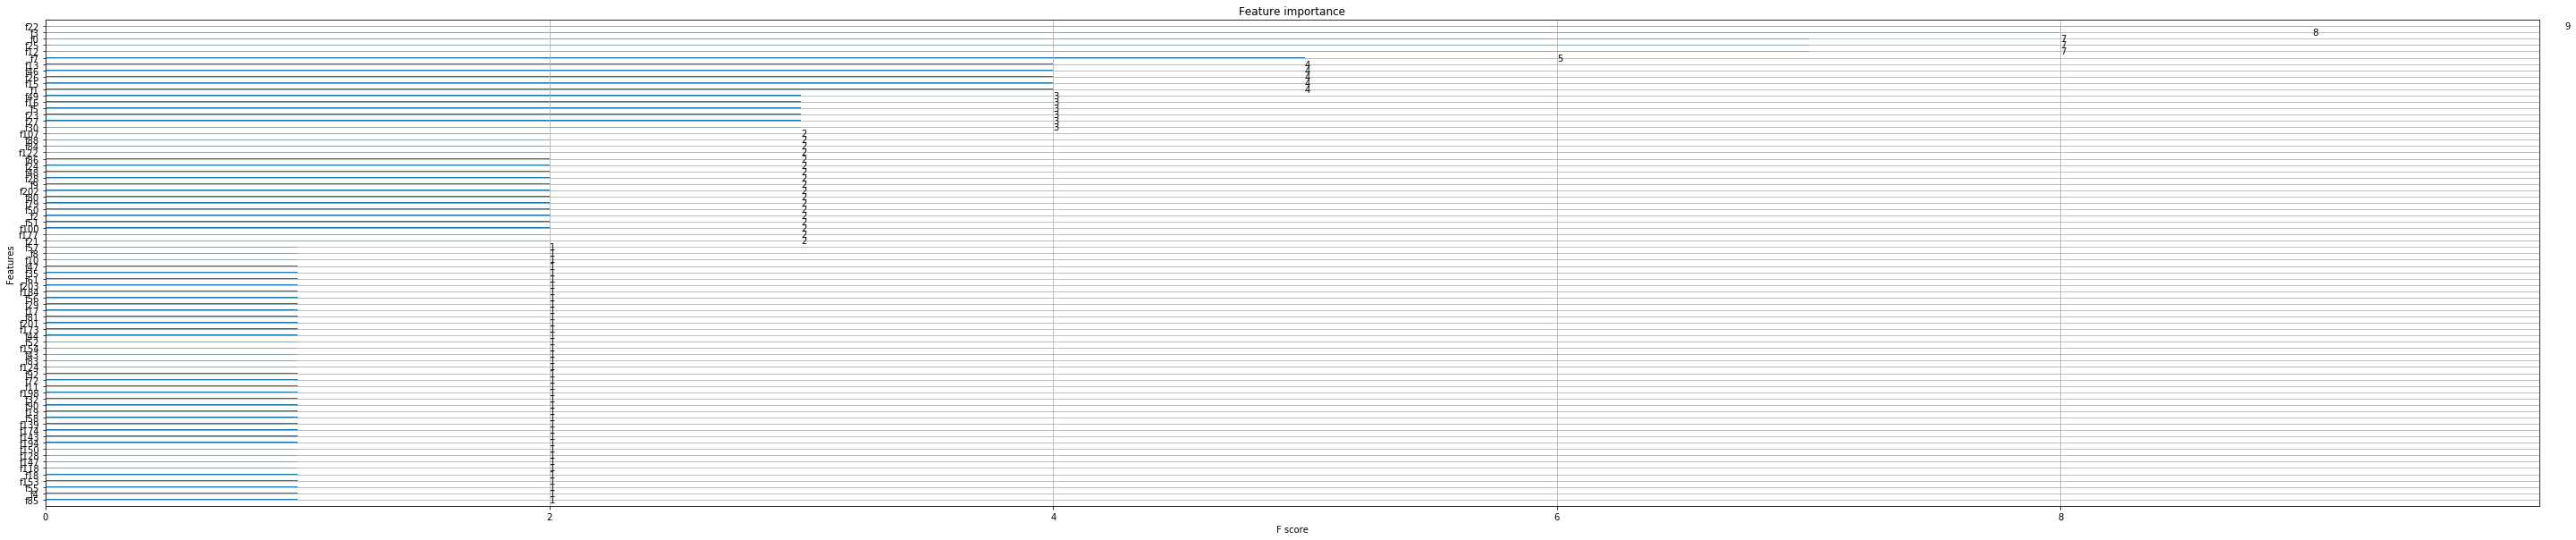

In [27]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()